In [1]:
#Let's first tackle our imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import binom
from scipy.stats import ttest_ind

In [2]:
#Load data as a dataframe
df = pd.read_csv('assessment_da25.csv')

In [3]:
df.head()

,Variant,Number of page views,GMV (in $),Number of add to cart,Clicks on media,Time on Page (sec),user_id
0,A,5,0.0,0,2,74,0
1,A,4,0.0,4,1,21,1
2,A,4,0.0,2,0,1,2
3,A,5,0.0,0,1,26,3
4,A,5,0.0,3,3,46,4


In [4]:
#First, we'll make sure there are no null values in the data
df.isna().sum()

Variant                  0
Number of page views     0
GMV (in $)               0
Number of add to cart    0
Clicks on media          0
Time on Page (sec)       0
user_id                  0
dtype: int64

In [5]:
#Let's verify our sample size for each variant, as our data exists now
sample_size_df = df.groupby("Variant").count()
sample_size_df

,Number of page views,GMV (in $),Number of add to cart,Clicks on media,Time on Page (sec),user_id
Variant,,,,,,
A,1000,1000,1000,1000,1000,1000
B,1000,1000,1000,1000,1000,1000


In [6]:
#Let's also take a peek at the mean of each metric column 
mean_df = df.groupby("Variant").mean()
mean_df

,Number of page views,GMV (in $),Number of add to cart,Clicks on media,Time on Page (sec),user_id
Variant,,,,,,
A,4.985,7.68999,1.884,1.495,20.543,499.5
B,5.317,9.28953,2.469,1.324,20.047,1499.5


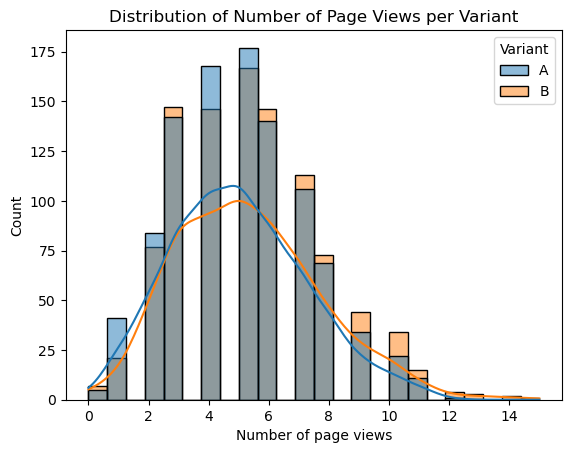

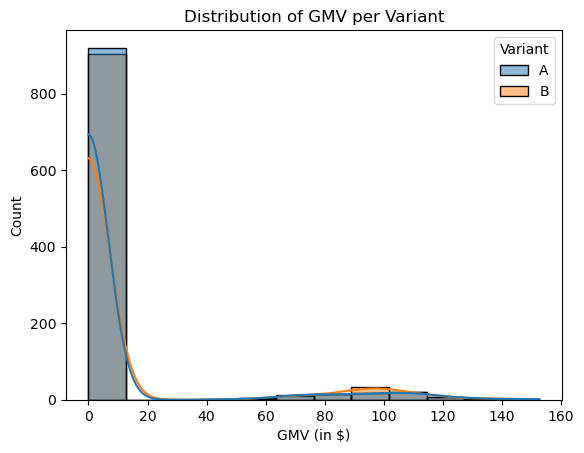

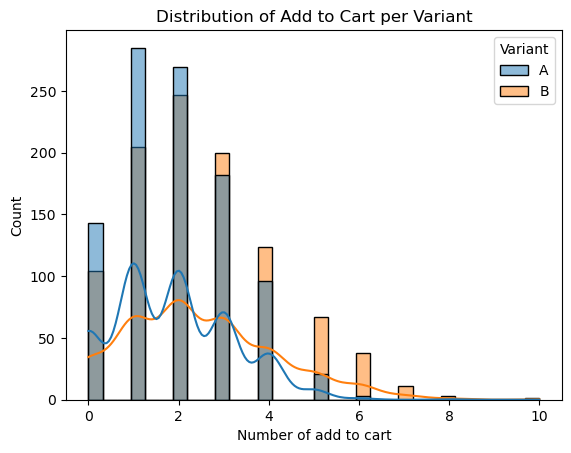

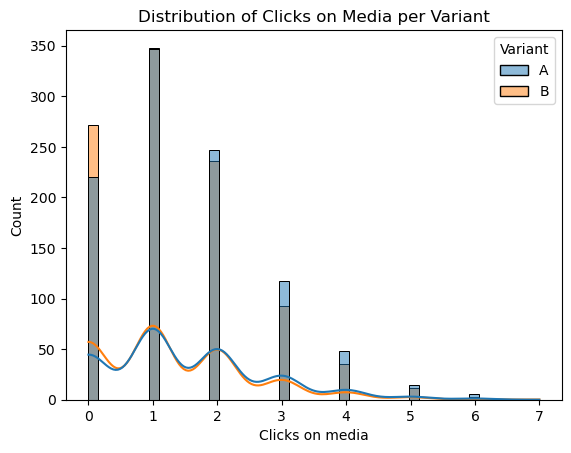

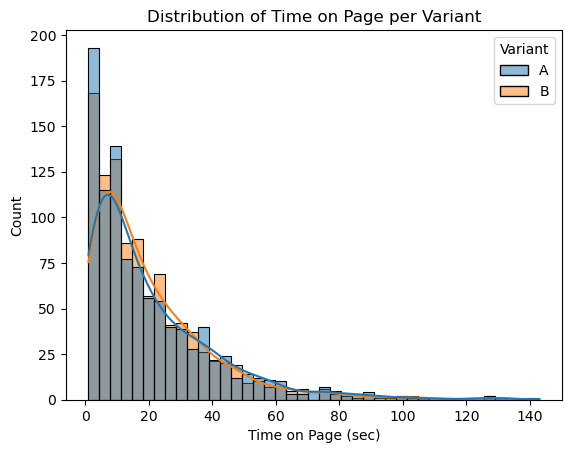

In [7]:
#Before we move on to our primary metric, for visual purposes and curiosity, let's plot all the original data into separate charts
sns.histplot(df,x='Number of page views',hue='Variant',kde=True)
plt.title('Distribution of Number of Page Views per Variant')
plt.show()

sns.histplot(df,x='GMV (in $)',hue='Variant',kde=True)
plt.title('Distribution of GMV per Variant')
plt.show()

sns.histplot(df,x='Number of add to cart',hue='Variant',kde=True)
plt.title('Distribution of Add to Cart per Variant')
plt.show()

sns.histplot(df,x='Clicks on media',hue='Variant',kde=True)
plt.title('Distribution of Clicks on Media per Variant')
plt.show()

sns.histplot(df,x='Time on Page (sec)',hue='Variant',kde=True)
plt.title('Distribution of Time on Page per Variant')
plt.show()

In [8]:
#Let's set the hypothesis we'll be testing for our chosen metrics:
#HO: There is NO significant statistical difference between the control variant (A) and experimental variant (B)
#H1: There IS a significant statistical difference between the control variant (A) and experimental variant (B)

In [27]:
#For our primary metric, let's calculate Add to Cart Rates

# Calculate the Add to Cart Rate for each row (divide number of ATC sessions by number of total sessions, aka number of page views
df['add_to_cart_rate'] = df['Number of add to cart'] / df['Number of page views']

#We want to make sure we don't count rows where 'number of page views' is zero. Let's filter those out and assign to 'filtered_df'
filtered_df = df[df['Number of page views'] != 0]

# Create subsets for each variant
variant_A = filtered_df[filtered_df['Variant'] == 'A']
variant_B = filtered_df[filtered_df['Variant'] == 'B']

# Extract add-to-cart rates for each variant
#We don't need to add the 'df' to 'add_to_cart_rate' again because when we use pandas to select a column from a DF, there's no need to specify 'df' again inside the brackets
ATC_rate_A = variant_A['add_to_cart_rate']
ATC_rate_B = variant_B['add_to_cart_rate']

In [31]:
#Let's also find the mean for each
mean_ATC_A = ATC_rate_A.mean()
mean_ATC_B = ATC_rate_B.mean()
print("Mean ATC variant A:", mean_ATC_A)
print("Mean ATC variant B:", mean_ATC_B)

Mean ATC variant A: 0.5065218226776015
Mean ATC variant B: 0.5812600569398153


In [20]:
#Let's then perform a T-test on ATC rates for A and B, and print our results
t_stat, p_value = ttest_ind(ATC_rate_A, ATC_rate_B, equal_var=False)
print(f"T-Stat: {t_stat:.4f}, P-Value: {p_value:.4f}")

#Using the industry standard 5% alpha, do we reject or fail to reject H0?
if p_value < 0.05:
    print("There IS a statistically significant difference in ATC rates between variants A and B; reject H0")
else:
    print("There is NO statistically significant difference in ATC rates between variants A and B; fail to reject H0")

T-Stat: -3.0091, P-Value: 0.0027
There IS a statistically significant difference in ATC rates between variants A and B; reject H0


In [32]:
print("")

In [ ]:
#For our secondary metrics, let's calculate Clicks on Media and GMV (in $)
#We'll refer to the same hypothesis we used for our primary metric as the reference for our calculations

In [33]:
#As listed above, this was our number of Clicks on Media for both variants
COM_a = df[df['Variant'] == 'A']['Clicks on media']
COM_b = df[df['Variant'] == 'B']['Clicks on media']

#And this was our mean for each
print("COM mean for Variant A:", COM_a.mean())
print("COM mean for Variant B:", COM_b.mean())

COM mean for Variant A: 1.495
COM mean for Variant B: 1.324


In [35]:
#Because we have the mean, run T-test for COM (clicks on media)
t_stat, p_value = ttest_ind(COM_a, COM_b)

print("T-stat:", t_stat)
print("P-value:", p_value)

if p_value < 0.05:
    print("There IS a statistically significant difference in COM between variants A and B; reject H0")
else:
    print("There is NO statistically significant difference in COM between variants A and B; fail to reject H0")

T-stat: 3.1710702328903153
P-value: 0.0015418189281850277
There IS a statistically significant difference in COM between variants A and B; reject H0


In [36]:
#Let's do the same for GMV (in $)
GMV_a = df[df['Variant'] == 'A']['GMV (in $)']
GMV_b = df[df['Variant'] == 'B']['GMV (in $)']

#And our mean for each
print("GMV mean for Variant A:", GMV_a.mean())
print("GMV mean for Variant B:", GMV_b.mean())

GMV mean for Variant A: 7.689989999999999
GMV mean for Variant B: 9.28953


In [37]:
#Because we have the mean, run T-test for GMV (in $)
t_stat, p_value = ttest_ind(GMV_a, GMV_b)

print("T-stat:", t_stat)
print("P-value:", p_value)

if p_value < 0.05:
    print("There IS a statistically significant difference in COM between variants A and B; reject H0")
else:
    print("There is NO statistically significant difference in COM between variants A and B; fail to reject H0")

T-stat: -1.2839539769831623
P-value: 0.19930692918202245
There is NO statistically significant difference in COM between variants A and B; fail to reject H0
